# Dimensionality Reduction

## Principal component analysis

### Standardizing the dataset

In [1]:
import numpy as np
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
print(X.shape, y.shape)

(178, 13) (178,)


Split the dataset

In [3]:
n = len(y)
seed = 0
rng = np.random.default_rng(seed)
mask = rng.permutation(list(range(n)))

test_ratio = 0.3
n_test = int(n*test_ratio)
n_train = n-n_test

X_train, y_train = X[mask][:n_train], y[mask][:n_train]
X_test, y_test = X[mask][n_train:], y[mask][n_train:]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(125, 13) (125,)
(53, 13) (53,)


### The problem

In [4]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train, y_train)

lr_train_score = np.sum(lr.predict(X_train) == y_train)/y_train.shape[0]
lr_test_score = np.sum(lr.predict(X_test) == y_test)/y_test.shape[0]

/home/roman/.venv/scikit-learn/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/roman/.venv/scikit-learn/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

Standardize the dataset

In [5]:
mu = np.mean(X_train, axis=0)
sigma = np.std(X_train, axis=0)

X_train_std = (X_train-mu)/sigma
X_test_std = (X_test-mu)/sigma

mu_std = np.mean(X_train_std, axis=0)
print('Mean of standardized X dataset:', mu_std.sum())
print('Maximum value in standardized X dataset:', np.max(X_train_std))
print('Minimum value in standardized X dataset:', np.min(X_train_std))

Mean of standardized X dataset: 1.5189405289106616e-14
Maximum value in standardized X dataset: 3.566160233688511
Minimum value in standardized X dataset: -2.770690609411453


### Constructing the covariance matrix

In [6]:
cov_mat = (X_train_std.T @ X_train_std)/(X_train_std.shape[0]-1)
sanity_check = (np.abs(np.cov(X_train_std.T)-cov_mat)).sum()
print(cov_mat.shape)
print(sanity_check)

(13, 13)
2.0721498925372825e-14


### Eigendecomposition of the covariance matrix

In [7]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print(eigen_vecs.shape)
print(eigen_vals)

(13, 13)
[4.92948322 2.63132883 1.3053539  1.07271228 0.6806716  0.63887626
 0.48991821 0.08534416 0.15961847 0.31882517 0.30181124 0.25244033
 0.23845504]


In [8]:
# eigenvectors are unit vectors
for i in range(13):
    print(np.linalg.norm(eigen_vecs[i]))

0.9999999999999986
0.9999999999999994
1.000000000000002
1.0000000000000016
1.0000000000000002
1.0
0.9999999999999999
0.9999999999999992
1.0000000000000004
0.999999999999999
1.0000000000000009
0.9999999999999998
0.9999999999999983


### Total and explained variance

In [9]:
eigen_vals_tot = eigen_vals.sum()
print(eigen_vals_tot)

13.104838709677425


In [10]:
var_exp = [(i / eigen_vals_tot) for i in sorted(eigen_vals, reverse=True)]
print(var_exp)

[0.3761574890813303, 0.20079063050156828, 0.09960854394667698, 0.08185619859480776, 0.05194047894157071, 0.0487511729293207, 0.037384528191936515, 0.02432881292481885, 0.02303051927092223, 0.019263139361320947, 0.018195953883758362, 0.012180116746979107, 0.006512415624989267]


Scree plot

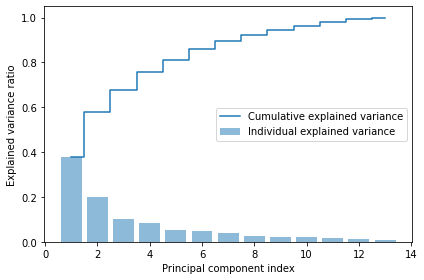

In [11]:
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt

plt.bar(range(1, len(var_exp)+1), var_exp, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, len(var_exp)+1), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/PCA-scree-plot.png', dpi=75)
plt.show()

### Feature transformation

In [12]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [13]:
W = np.vstack((eigen_pairs[0][1], eigen_pairs[1][1])).T
print(W)

[[-0.17045478  0.4655508 ]
 [ 0.23124045  0.14116707]
 [-0.00842037  0.29032992]
 [ 0.26890434 -0.03324123]
 [-0.15050066  0.40844378]
 [-0.39552547  0.0157164 ]
 [-0.42785867 -0.03940221]
 [ 0.30013094  0.02595108]
 [-0.30669741 -0.00968316]
 [ 0.0766788   0.52893448]
 [-0.28332753 -0.25512306]
 [-0.36624036 -0.21979642]
 [-0.28019757  0.33966875]]


In [14]:
X_train_pca = X_train_std @ W
X_train_pca.shape

(125, 2)

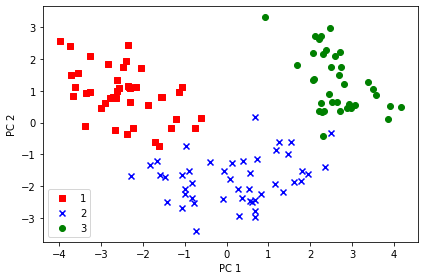

In [15]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for label, color, marker in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == label, 0], 
                X_train_pca[y_train == label, 1], 
                c=color, label=label, marker=marker)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/PCA-transformed-data.png', dpi=75)
plt.show()

### PCA in scikit-learn

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(124, 13) (124,)
(54, 13) (54,)


In [17]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

mu_std = np.mean(X_train_std, axis=0)
print('Mean of standardized X dataset:', mu_std.sum())
print('Maximum value in standardized X dataset:', np.max(X_train_std))
print('Minimum value in standardized X dataset:', np.min(X_train_std))

Mean of standardized X dataset: 1.1873846440130412e-14
Maximum value in standardized X dataset: 3.6932366525105946
Minimum value in standardized X dataset: -2.55493448916567


In [18]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
print(pca.explained_variance_ratio_)

[0.36951469 0.18434927 0.11815159 0.07334252 0.06422108 0.05051724
 0.03954654 0.02643918 0.02389319 0.01629614 0.01380021 0.01172226
 0.00820609]


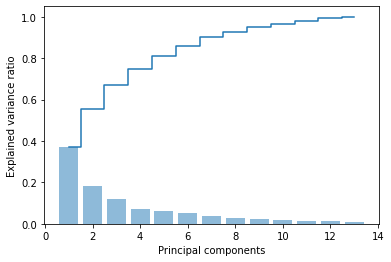

In [19]:
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

In [20]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

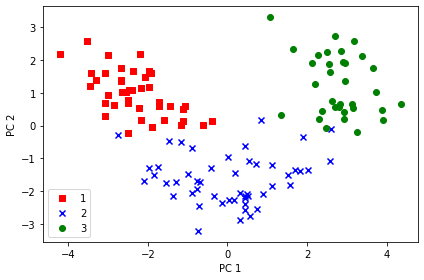

In [21]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for label, color, marker in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == label, 0], 
                X_train_pca[y_train == label, 1], 
                c=color, label=label, marker=marker)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/PCA-transformed-data.png', dpi=75)
plt.show()

In [22]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'o', 'v', '^', 'X')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot examples by class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

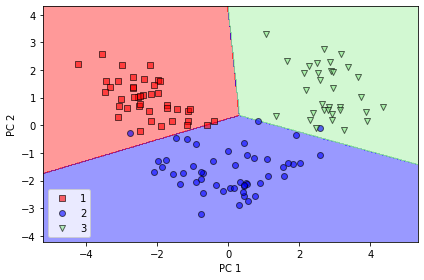

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_pca, y_train)

plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/PCA-training.png', dpi=75)
plt.show()

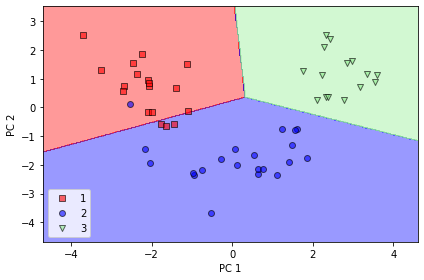

In [24]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/PCA-prediction.png', dpi=75)
plt.show()

In [25]:
train_score = np.sum(lr.predict(X_train_pca) == y_train)/y_train.shape[0]
test_score = np.sum(lr.predict(X_test_pca) == y_test)/y_test.shape[0]
print(train_score, test_score)

0.9838709677419355 0.9259259259259259


In [26]:
test_got_wrong = y_test.shape[0] - np.sum(lr.predict(X_test_pca) == y_test)
print(test_got_wrong)

4


## Linear discriminant analysis

### Scatter matrices

Compute the within-class scatter matrix

In [27]:
np.set_printoptions(precision=4)

d = X_train_std.shape[1]
S_W = np.zeros((d, d))
mean_vecs = list()

for label in np.unique(y_train):
    A = X_train_std[y_train == label]
    mu = np.mean(A, axis=0) # mean vector per class
    mean_vecs.append(mu)
    S_W += (A - mu).T @ (A - mu)
S_W[:5,:5]

array([[ 50.7221,   3.1007,  -7.9323,  -5.7848,  -2.8879],
       [  3.1007,  90.1791,   4.7074,  14.7501, -10.9   ],
       [ -7.9323,   4.7074, 111.8916,  70.1256,  22.2134],
       [ -5.7848,  14.7501,  70.1256,  92.1468,  12.4845],
       [ -2.8879, -10.9   ,  22.2134,  12.4845, 106.0488]])

In [28]:
print('Class label distribution: %s' 
      % np.bincount(y_train)[1:])

Class label distribution: [41 50 33]


In [29]:
S_W = np.zeros((d, d))

for label, mu in zip(np.unique(y_train), mean_vecs):
    A = X_train_std[y_train == label]
    S_W += ((A - mu).T @ (A - mu))/(A.shape[0]-1)
S_W[:5,:5]

array([[ 1.2448,  0.0967, -0.1276, -0.1105, -0.0726],
       [ 0.0967,  2.2666,  0.1168,  0.3517, -0.2622],
       [-0.1276,  0.1168,  2.6024,  1.6442,  0.5364],
       [-0.1105,  0.3517,  1.6442,  2.1604,  0.325 ],
       [-0.0726, -0.2622,  0.5364,  0.325 ,  2.4397]])

In [30]:
S_W = np.zeros((d, d))

for label in np.unique(y_train):
    # another way to do the same thing
    S_W += np.cov(X_train_std[y_train == label].T)
S_W[:5,:5]

array([[ 1.2448,  0.0967, -0.1276, -0.1105, -0.0726],
       [ 0.0967,  2.2666,  0.1168,  0.3517, -0.2622],
       [-0.1276,  0.1168,  2.6024,  1.6442,  0.5364],
       [-0.1105,  0.3517,  1.6442,  2.1604,  0.325 ],
       [-0.0726, -0.2622,  0.5364,  0.325 ,  2.4397]])

Compute the between-class scatter matrix

In [31]:
mean_overall = np.mean(X_train_std, axis=0)
mean_overall = mean_overall.reshape(d, 1)  # make column vector
S_B = np.zeros((d, d))

for label, mu in zip(np.unique(y_train), mean_vecs):
    A = X_train_std[y_train == label]
    n = A.shape[0]
    mu = mu.reshape(d, 1)  # make column vector
    S_B += n * (mu - mean_overall).dot((mu - mean_overall).T)
S_B[:5,:5]

array([[ 73.2779,   5.1521,  29.3409, -37.8053,  35.3288],
       [  5.1521,  33.8209,   5.5342,  17.6688,  -3.0595],
       [ 29.3409,   5.5342,  12.1084, -13.0286,  13.5707],
       [-37.8053,  17.6688, -13.0286,  31.8532, -21.5944],
       [ 35.3288,  -3.0595,  13.5707, -21.5944,  17.9512]])

### Computing linear discriminants

In [32]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

print('Eigenvalues in descending order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in descending order:

4.929483223848081
2.6313288271374886
1.3053539025270176
1.0727122799722797
0.6806715990326809
0.6388762581463401
0.4899182121927167
0.31882516937766653
0.3018112404455535
0.25244033437214963
0.23845504081538188
0.15961846543420208
0.08534415637586744


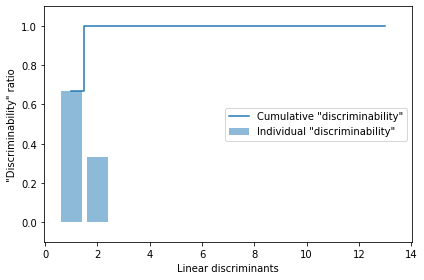

In [33]:
eigen_vals_tot = np.sum(eigen_vals.real)
discr = [(i / eigen_vals_tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 14), discr, alpha=0.5, align='center',
        label='Individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid',
         label='Cumulative "discriminability"')
plt.ylabel('"Discriminability" ratio')
plt.xlabel('Linear discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/LDA-Scree-plot.png', dpi=75)
plt.show()

### Feature transformation

In [34]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

eigen_pairs.sort(key=lambda k: k[0], reverse=True)

W = np.vstack((eigen_pairs[0][1].real, eigen_pairs[1][1].real)).T

X_train_lda = X_train_std @ W
print(W)

[[-0.1481 -0.4092]
 [ 0.0908 -0.1577]
 [-0.0168 -0.3537]
 [ 0.1484  0.3223]
 [-0.0163 -0.0817]
 [ 0.1913  0.0842]
 [-0.7338  0.2823]
 [-0.075  -0.0102]
 [ 0.0018  0.0907]
 [ 0.294  -0.2152]
 [-0.0328  0.2747]
 [-0.3547 -0.0124]
 [-0.3915 -0.5958]]


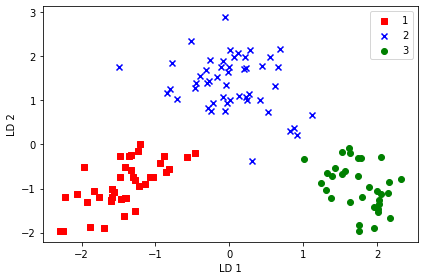

In [35]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for label, color, marker in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == label, 0], 
                X_train_lda[y_train == label, 1], 
                c=color, label=label, marker=marker)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='upper right')
plt.tight_layout()
# plt.savefig('images/LDA-transformed-data.png', dpi=75)
plt.show()

## LDA in scikit-learn

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

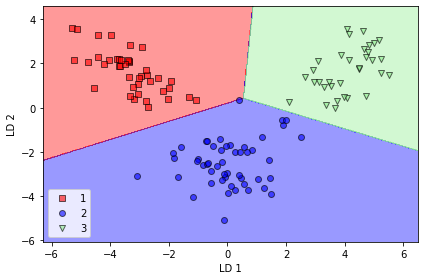

In [37]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/LDA-training.png', dpi=75)
plt.show()

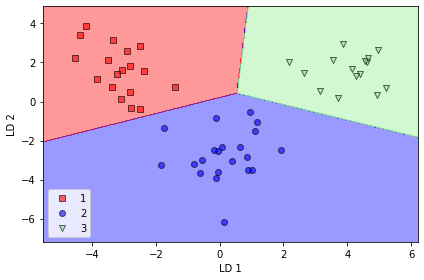

In [38]:
X_test_lda = lda.transform(X_test_std)

plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/LDA-prediction', dpi=75)
plt.show()

In [39]:
train_score = np.sum(lr.predict(X_train_lda) == y_train)/y_train.shape[0]
test_score = np.sum(lr.predict(X_test_lda) == y_test)/y_test.shape[0]
print(train_score, test_score)

1.0 1.0


In [40]:
test_got_wrong = y_test.shape[0] - np.sum(lr.predict(X_test_lda) == y_test)
print(test_got_wrong)

0


## Miscellaneous

### Comparison of variances

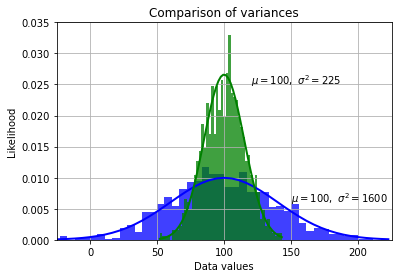

In [41]:
seed = 0
mu, sigma1, sigma2 = 100, 40, 15

rng = np.random.default_rng(seed)
x1 = rng.normal(mu, sigma1, 1000)
x2 = rng.normal(mu, sigma2, 1000)

# the histogram of the data
n, bins, patches = plt.hist(x1, 50, density=True, facecolor='b', alpha=0.75)
plt.plot(bins, 1/(sigma1 * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma1**2) ),
         linewidth=2, color='b')
n, bins, patches = plt.hist(x2, 50, density=True, facecolor='g', alpha=0.75)
plt.plot(bins, 1/(sigma2 * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma2**2) ),
         linewidth=2, color='g')

plt.title('Comparison of variances')
plt.text(120, .025, r'$\mu=100,\ \sigma^2=225$')
plt.text(150, .006, r'$\mu=100,\ \sigma^2=1600$')
plt.xlabel('Data values')
plt.ylabel('Likelihood')
plt.xlim(-25, 225)
plt.ylim(0, 0.035)
plt.grid(True)
# plt.savefig('images/comparison-of-variances.png', dpi=75)
plt.show()

### Variances of standardized data

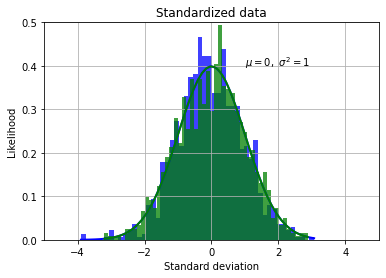

In [42]:
x1_std = (x1-mu)/sigma1
x2_std = (x2-mu)/sigma2

# the histogram of the data
n, bins, patches = plt.hist(x1_std, 50, density=True, facecolor='b', alpha=0.75)
plt.plot(bins, 1/(1 * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - 0)**2 / (2 * 1**2) ),
         linewidth=2, color='b')
n, bins, patches = plt.hist(x2_std, 50, density=True, facecolor='g', alpha=0.75)
plt.plot(bins, 1/(1 * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - 0)**2 / (2 * 1**2) ),
         linewidth=2, color='g')

plt.title('Standardized data')
plt.text(1, .4, r'$\mu=0,\ \sigma^2=1$')
plt.xlabel('Standard deviation')
plt.ylabel('Likelihood')
plt.xlim(-5, 5)
plt.ylim(0, 0.5)
plt.grid(True)
# plt.savefig('images/standardized-data.png', dpi=75)
plt.show()

### Histogram of dataset features

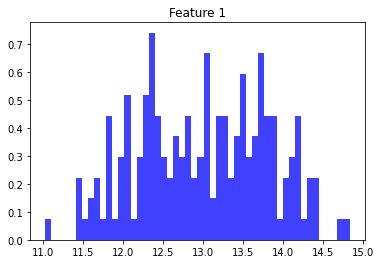

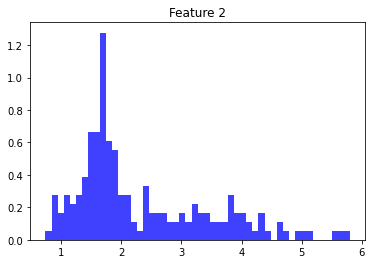

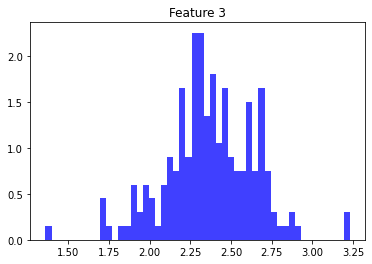

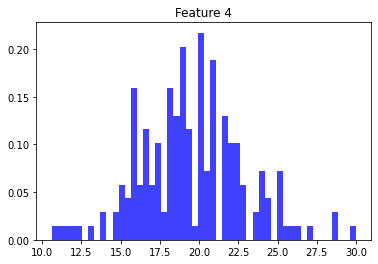

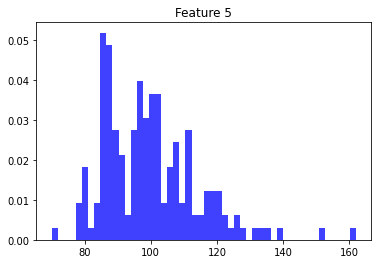

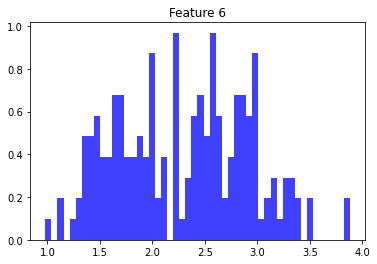

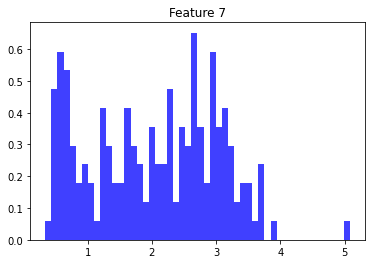

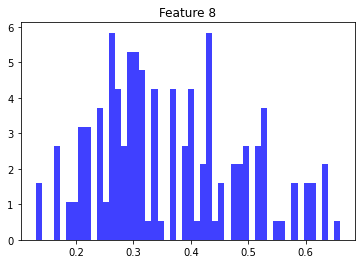

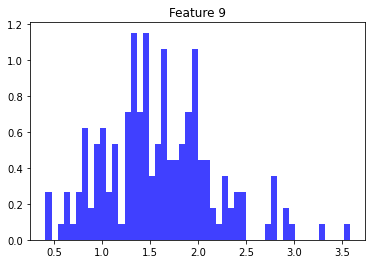

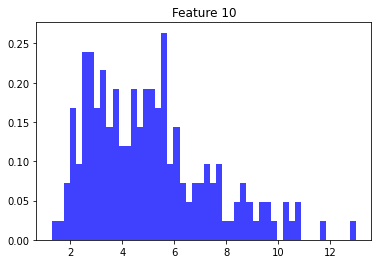

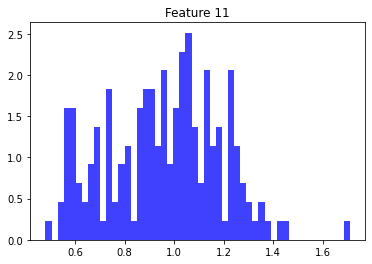

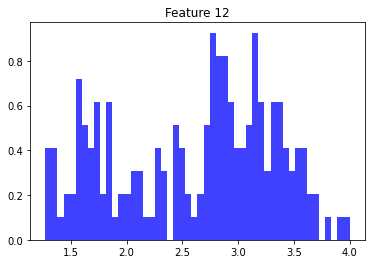

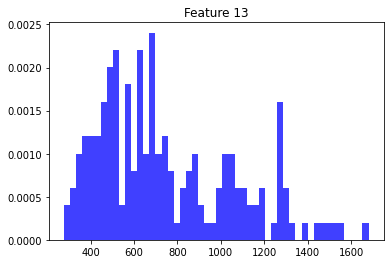

In [43]:
for i in range(13):
    n, bins, patches = plt.hist(X[:,i], 50, density=True, facecolor='b', alpha=0.75)
    plt.title(f'Feature {i+1}')
    plt.show()